# Covid-19 Prediction Steps:CNN

### 1.Importing Required Libraries
### 2.Building Architecture of the CNN Model
### 3.Splitting image data into Training and Testing
### 4.Model Building by Training Data
### 5.Model Accuracy & Performance

In [1]:
#Importing Required Libraries
import pandas as pd
import os
import shutil
from keras.layers import *
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
#Building Architecture of the CNN 
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2,activation='softmax'))


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [7]:
# Using cost function and optimizer & Evaluation Metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [8]:
#Normalizing pixel size and preparing training and validation data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 290 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [9]:
training_set.class_indices

{'covid': 0, 'normal': 1}

In [10]:
# fit the model
model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=10,
  validation_steps=8
)



Epoch 1/5
10/10 [==============================] - 274s 27s/step - loss: 0.8612 - accuracy: 0.5483 - val_loss: 0.7250 - val_accuracy: 0.4951
Epoch 2/5
10/10 [==============================] - 140s 14s/step - loss: 0.6287 - accuracy: 0.6276 - val_loss: 0.6308 - val_accuracy: 0.6573
Epoch 3/5
10/10 [==============================] - 143s 14s/step - loss: 0.5004 - accuracy: 0.8034 - val_loss: 0.4260 - val_accuracy: 0.8876
Epoch 4/5
10/10 [==============================] - 143s 14s/step - loss: 0.3937 - accuracy: 0.8517 - val_loss: 0.2426 - val_accuracy: 0.9559
Epoch 5/5
10/10 [==============================] - 142s 14s/step - loss: 0.2938 - accuracy: 0.8724 - val_loss: 0.2837 - val_accuracy: 0.9326


In [23]:
img=image.load_img('dataset/test/normal/IM-0325-0001.jpeg',target_size=(224,224,3))

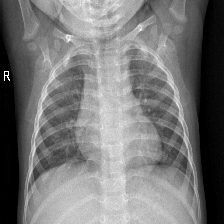

In [24]:
img

In [26]:
img_array=image.img_to_array(img)

In [27]:
img_array=img_array/255#normalizing pixel values of image 0 to 1

In [28]:
img_array=img_array.reshape((1,)+img_array.shape)#array should be(1,224,224,3)

In [29]:
img_array.shape

(1, 224, 224, 3)

In [ ]:
#x=np.expand_dims(img_array/255,axis=0)

In [30]:
XRAY_Pred=model.predict(img_array)

In [31]:
XRAY_Pred

array([[0.03197368, 0.9680263 ]], dtype=float32)

In [32]:
image_type_class=XRAY_Pred.argmax()

In [33]:
image_type_class

1

In [34]:
if (image_type_class==0):
    print('COVID XRAY')
else:
    print('NORMAL XRAY')
    

NORMAL XRAY
